# Behavioral Cloning with Keras Project - image preprocessing


## Load the data

In [2]:
# Load images into an array
from skimage.io import imread_collection
from skimage.io import concatenate_images
import numpy as np
import os
import numpy as np
from numpy import genfromtxt
import random
from scipy.misc import imresize
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pickle

Loading center images...
Loading left images...
Loading right images...
Finished loading images.


In [ ]:
print("Loading center images...")
images_center = imread_collection('track1_IMG/center*.jpg')
image_array_center = concatenate_images(images_center)
print("Loading left images...")
images_left = imread_collection('track1_IMG/left*.jpg')
image_array_left = concatenate_images(images_left)
print("Loading right images...")
images_rigth = imread_collection('track1_IMG/right*.jpg')
image_array_right = concatenate_images(images_rigth)
print("Finished loading images.")
image_array = np.concatenate((image_array_center,image_array_left,image_array_right))

In [3]:
int(len(image_array)/3)
for i in range(0,len(image_array),int(len(image_array)/3)):
    print("{} {}".format(i,image_array[i,0,0]))

0 [116 145 185]
1976 [116 145 185]
3952 [116 145 185]


In [4]:
# Load Steering angles into array

print("Loading steering angles...")
file_data = genfromtxt('track1_driving_log.csv', delimiter=',')
print("Finished loading steering angles.")

Loading steering angles...
Finished loading steering angles.


In [5]:
angle = file_data[...,3]
angle = np.concatenate((angle,angle,angle))

In [12]:
index = random.randint(0, len(image_array))
angle[index]

-0.1285403

Angle of  -0.1285403
Image at index:  376
Image dimensions are  (160, 320, 3)


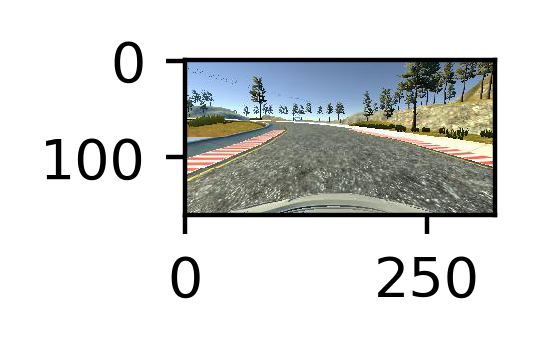

In [13]:
# Visualize the images
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

image = image_array[index]

plt.figure(figsize=(1,1),dpi=400)
plt.imshow(image)
print("Angle of ",angle[index])
print("Image at index: ", index)
print("Image dimensions are ", image.shape)

# Preprocessing

## Normalize function

In [14]:
def normalizer(array, min_max=(0,1), feature_range=(0, 1)):
    x_min = feature_range[0]
    x_max = feature_range[1]
    a = min_max[0]
    b = min_max[1]
    norm_features = (array-x_min)*(b-a)/(x_max - x_min) + a
    return norm_features

## Normalize steering angle

I decided to normalize the steering angle to between -0.5 and 0.5 to have a unit spread and a mean of 0.

Steering of -1 correspnds to -25 degrees and 1 +25 degrees.

In [15]:
# Normalize the steering angles to between -0.5 and 0.5. They are currently recorded to between -1.0 and 1.0
print("Normalizing steering angles...")
angle_nomalized = normalizer(angle, min_max=(-0.5,0.5), feature_range=(-1.0,1.0))
print("Steering angles normalized")

Normalizing steering angles...
Steering angles normalized


## Reduce image size
Don't need as many features which will overly complexify the training

In [16]:
from scipy.misc import imresize

(66, 200, 3)


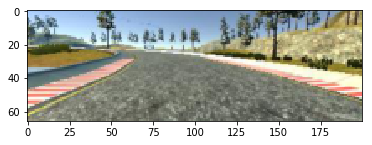

In [17]:
image2 = imresize(image, (100,200,3))[16:,:,:][:66,:,:]
print(image2.shape)
plt.imshow(image2)

In [18]:
resized_images = [imresize(image, (100,200,3))[16:,:,:][:66,:,:] for image in image_array]
resized_images = np.array(resized_images)

(5928, 66, 200, 3)


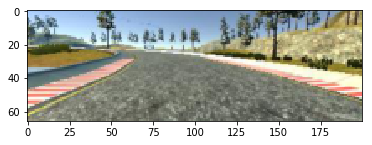

In [19]:
plt.imshow(resized_images[index])
print(resized_images.shape)

In [20]:
resized_images[index,0,0]

array([173, 207, 252], dtype=uint8)

## Normalize image channels

I normalized the image channels to between 0 and 1, moving 0 to 0 and 255 to 1

In [21]:
# Normalize the image channels to between 0 and 1
print("Normalizing image channels...")
normalized_images = normalizer(resized_images, min_max=(0,1), feature_range=(0,255))
print("Normalization complete")

Normalizing image channels...
Normalization complete


In [22]:
print(image_array[0,0,0])
print(resized_images[0,0,0])
print(normalized_images[0,0,0])

[116 145 185]
[109 124  90]
[ 0.42745098  0.48627451  0.35294118]


# Shuffle the data

In [23]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(normalized_images, angle_nomalized)

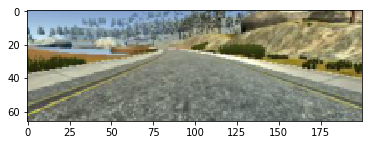

In [24]:
plt.imshow(X_train[index])

## Split the data into train, validation and test data

In [25]:
# Perform a train / test split

from sklearn.model_selection import train_test_split

print("Split into train, validation and test data")
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.4, random_state=36)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=97)
print("Train size {}, validation size {}, test size {}".format(len(y_train), len(y_validation), len(y_test)))

Split into train, validation and test data
Train size 2844, validation size 712, test size 2372


## Save the data into a pickle so we don't have to process every time

In [26]:
import pickle

pickle_out = open('image_data.pkl', 'wb')
pickle.dump([X_train, X_validation, X_test, y_train, y_validation, y_test], pickle_out)
pickle_out.close()